# Final Project Proposal - 2


<br>
<br>


<div class="alert alert-block alert-danger">
    <p>⚠️ WARNING</p>
    <p>If you plagiarize existing analyses (e.g. copy cells from notebooks on kaggle.com) you will be referred to Kyoto University Administration for academic discipline, and you may receive a grade of 0% on your Final Project and/or relevant assignment submisison. <b>DO NOT PLAGIARIZE</b>. If you are concerned about the possibility of plagiarism, contact the instructor at pataky.todd.2m@kyoto-u.ac.jp</p>
</div>

<br>
<br>

___

### Overview:

* **Name**:  <span style="color:blue">Moe Thiri ZUN</span>
* **Student number**:  <span style="color:blue">6530-34-4544</span>
* **Project theme**:  <span style="color:blue">Hourly Energy Consumption of a Household</span>

<br>

# Purpose:

* The purpose of this Final Project is to determine the factors that contribute to daily energy consumption of a household.
* The key **dependent variable** (DV) is total daily energy consumption, a combination of appliances load (in Wh) and lights load (in Wh)
* Key **independent variables** (IVs) include:
    * T1, Temperature in kitchen area, in Celsius
    * RH_1, Humidity in kitchen area, in %
    * T2, Temperature in living room area, in Celsius
    * RH_2, Humidity in living room area, in %
    * T3, Temperature in laundry room area
    * RH_3, Humidity in laundry room area, in %
    * T4, Temperature in office room, in Celsius
    * RH_4, Humidity in office room, in %
    * T5, Temperature in bathroom, in Celsius
    * RH_5, Humidity in bathroom, in %
    * T6, Temperature outside the building (north side), in Celsius
    * RH_6, Humidity outside the building (north side), in %
    * T7, Temperature in ironing room , in Celsius
    * RH_7, Humidity in ironing room, in %
    * T8, Temperature in teenager room 2, in Celsius
    * RH_8, Humidity in teenager room 2, in %
    * T9, Temperature in parents room, in Celsius
    * RH_9, Humidity in parents room, in %
    * To, Temperature outside (from Chievres weather station), in Celsius
    * Pressure (from Chievres weather station), in mm Hg
    * RH_out, Humidity outside (from Chievres weather station), in %
    * Wind speed (from Chievres weather station), in m/s
    * Visibility (from Chievres weather station), in km
    * Tdewpoint (from Chievres weather station), °C
* This dataset contains 19735 cases (i.e., data collection for 4.5 months with 10 minute timestep). Each cases has values for all IVs as well as the DV. The timestep analyzed will be in terms of one hour. 
<br>

### Dataset source:

The data come from the [Appliance Energy Prediction Data Set](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction) dataset from the [UCI Machine Learning repository](https://archive.ics.uci.edu/ml/index.php):

The data are available for download [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00374/).

Analyses of this dataset have been published previously in Candanedo et al. (2017).


#### References:

Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788
doi: [10.1016/j.enbuild.2017.01.083](https://doi.org/10.1016/j.enbuild.2017.01.083)


### Preliminary results:

* <span style="color:blue">Add one **hypothesis testing** result, and one **machine learning** result.</span>
* <span style="color:blue">The results must be produced from the dataset proposed above.</span>
* <span style="color:blue">It is OK to use a data subset (i.e., not the entire dataset) for this proposal.</span>
* <span style="color:blue">The **hypothesis test** can be any test (t test, regression, ANOVA, etc.), including tests not covered directly during lecture.</span>
* <span style="color:blue">The **machine learning** result result (a) must include **at least two features**, and (b) can be classification, clustering or regression.</span>
* <span style="color:blue">Include all Python code in this notebook, including dataset reading / parsing.</span>
* <span style="color:blue">Include three figures:</span>
    * <span style="color:blue">(1) Data description.</span>
    * <span style="color:blue">(2) Hypothesis testing result.</span>
    * <span style="color:blue">(3) Machine learning result.</span>

<br>

⚠️  <span style="color:blue">**!!! IMPORTANT !!!** Submit your data file(s) to PandA.</span>


<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br>

### Preliminary results

First, import all necessary packages:

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neural_network import MLPClassifier
import sklearn.metrics
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from datetime import datetime

## Data cleaning and wrangling:

In [2]:
# Load CSV data using PandaS
df      = pd.read_csv( 'energydata_complete.csv', delimiter=',', parse_dates = True , index_col = 0 )

# Check null values
for c in df.isna().sum():
    assert c == 0

# drop random variables in the data sets
df.drop(columns = ["rv1", "rv2"], inplace = True)

# Resample it to hourly data
df = df.resample("H").mean()

# Calulate the total load (appliances + lights) and drop columns = ["Appliances", "lights"]
df["total"] = df["Appliances"] + df["lights"]
df.drop(columns = ["Appliances", "lights"], inplace = True)
df.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,total
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,...,48.710556,17.016667,45.446667,6.308333,733.750000,92.000000,6.166667,53.416667,5.050000,90.000000
2016-01-11 18:00:00,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,...,48.597222,16.981667,45.290000,5.941667,734.266667,91.583333,5.416667,40.000000,4.658333,228.333333
2016-01-11 19:00:00,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,...,49.213333,16.902222,45.311389,6.000000,734.791667,89.750000,6.000000,40.000000,4.391667,198.333333
2016-01-11 20:00:00,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,...,50.195556,16.890000,45.118889,6.000000,735.283333,87.583333,6.000000,40.000000,4.016667,160.000000
2016-01-11 21:00:00,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,...,49.542222,16.890000,44.807778,5.833333,735.566667,87.416667,6.000000,40.000000,3.816667,126.666667


<br>
<br>

### Data description:

As shown in Fig.1 below, there is no qualitatively clear relation between individual IVs and DV, therefore hypothesis test among them will be applied.

<br>

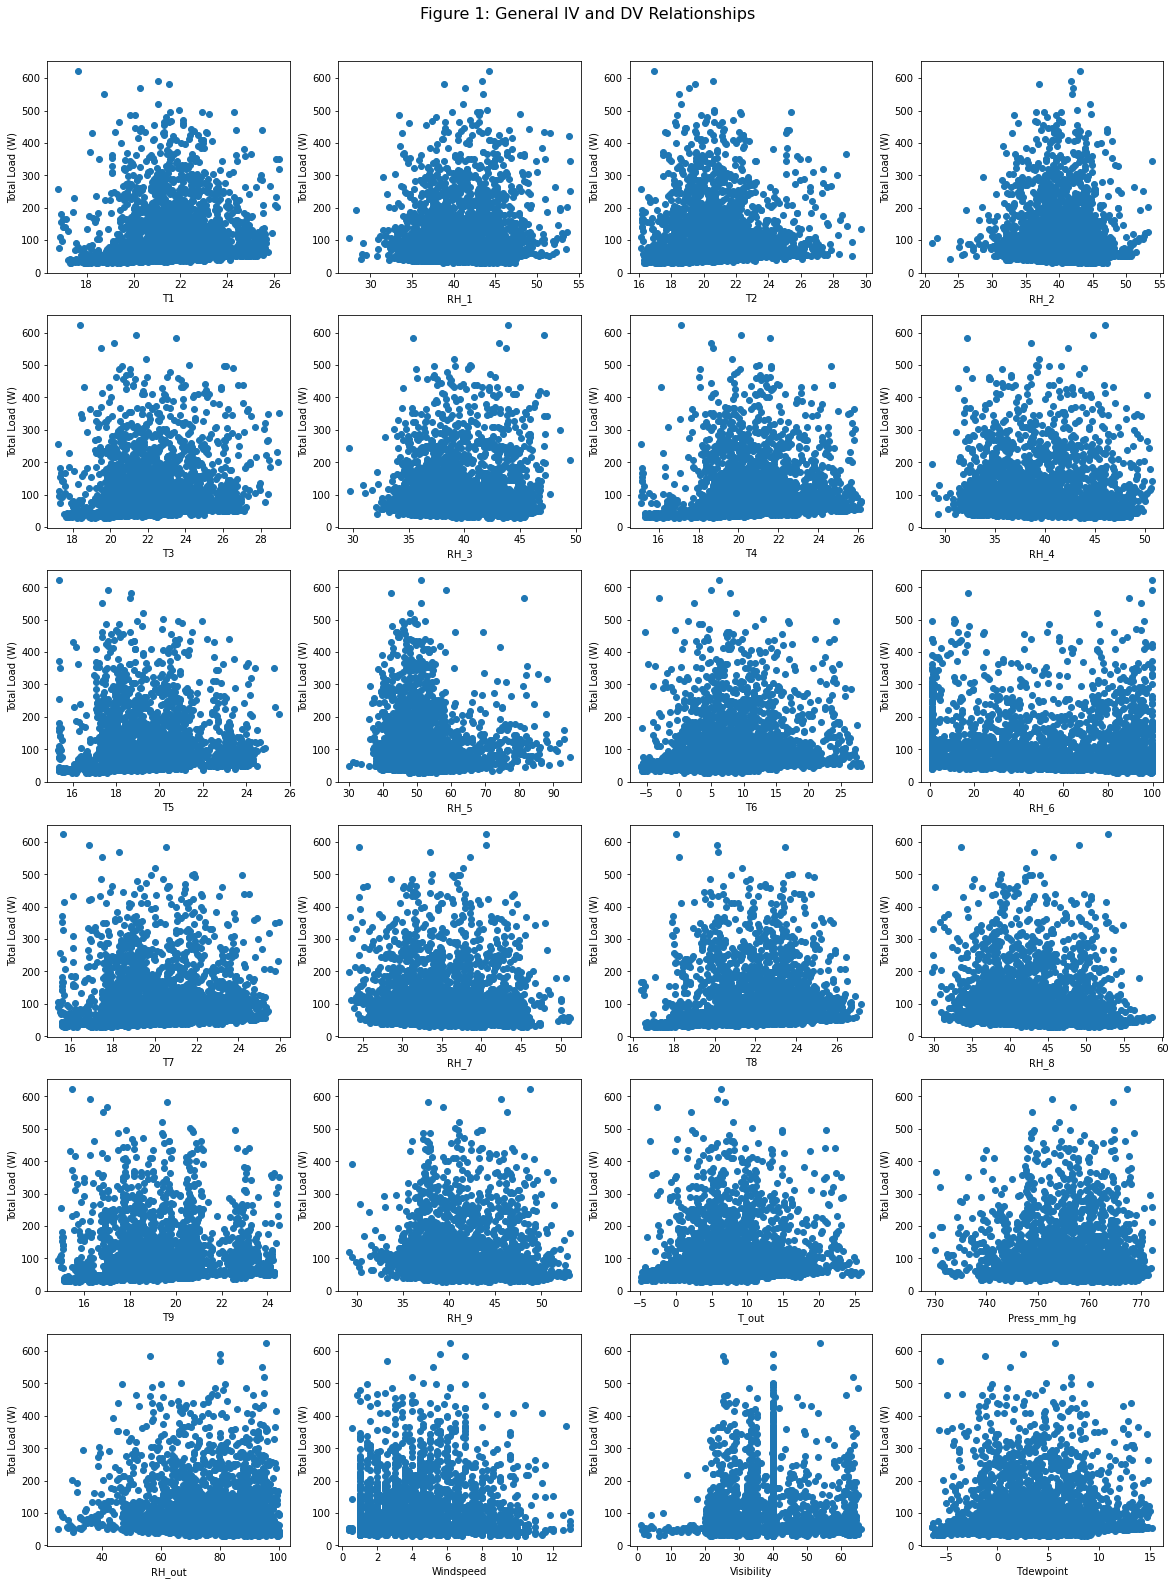

In [3]:
fig, axs = plt.subplots(6,4, figsize = (20, 25))
fig.subplots_adjust(top=0.95)
n = 0
for i in range(6):
    for j in range(4):
        axs[i,j].scatter(df[df.columns[n]], df["total"])
        axs[i,j].set(xlabel=df.columns[n], ylabel="Total Load (W)")
        n = n + 1
plt.suptitle("Figure 1: General IV and DV Relationships", fontsize = 16)
plt.show()

<br>
<br>

### Hypothesis testing result:

Since no clear patterns are evident in Fig.1, it's plotted in heatmap to visualize further. In addition, a regression test was conducted between all IVs and one DV. The IVs which are failed to reject the null hypothesis are dropped out of the further analysis.

<br>

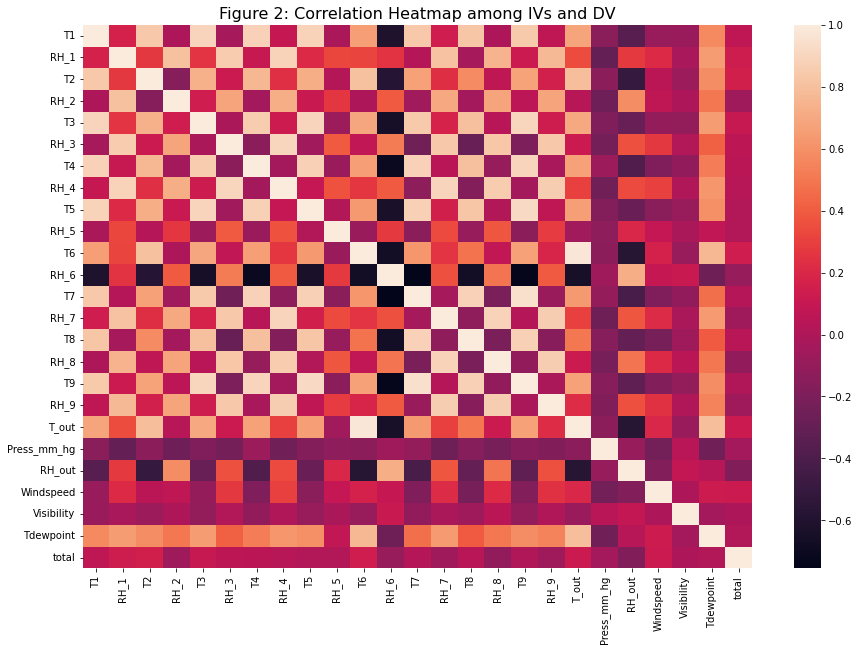

In [4]:
#Check collinearity among independent variables and correlation with dependent variable
corr = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr)
plt.title("Figure 2: Correlation Heatmap among IVs and DV", fontsize = 16)
plt.show()

In [5]:
variables = df.drop(columns = ["total"])
variable_names = {"T1" : "Temperature in kitchen area",
                  "RH_1" :  "Humidity in kitchen area",
                  "T2" : "Temperature in living room area", 
                  "RH_2" : "Humidity in living room area",
                  "T3" : "Temperature in laundry room area",
                  "RH_3" : "Humidity in laundry room area",
                  "T4" : "Temperature in office room",
                  "RH_4" : "Humidity in office room", 
                  "T5" : "Temperature in bathroom",
                  "RH_5" :  "Humidity in bathroom",
                  "T6" : "Temperature outside the building (north side)",
                  "RH_6" : "Humidity outside the building (north side)",
                  "T7" :  "Temperature in ironing room",
                  "RH_7" : "Humidity in ironing room",
                  "T8" : "Temperature in teenager room 2",
                  "RH_8" : "Humidity in teenager room 2",
                  "T9" : "Temperature in parents room",
                  "RH_9" : "Humidity in parents room",
                  "T_out" : "Temperature outside",
                  "Press_mm_hg" : "from Chievres weather station",
                  "RH_out" : "Humidity outside", 
                  "Windspeed" : "from Chievres weather station",
                  "Visibility" : "from Chievres weather station",
                  "Tdewpoint" : "from Chievres weather station"}
failed_to_reject = []
for column in variables:
    results = stats.linregress(df[column], df["total"])
    p = results.pvalue
    if p > 0.05:
        failed_to_reject.append(column)  

# Drop IV columns which fail to reject the null hypothesis
df.drop(columns = failed_to_reject, inplace = True)

<br>
<br>

### Machine learning result:
Linear regression machine learning is applied among the rest of IV's and DV for futher prediction. Mean absolute error is used as an indicator to evaluate the model. The baseline indicator comes from the mean total load. The difference between the baseline model and the trained model can be seen in figure 2.


<br>

Baseline MAE: 58.39
Training MAE: 48.64


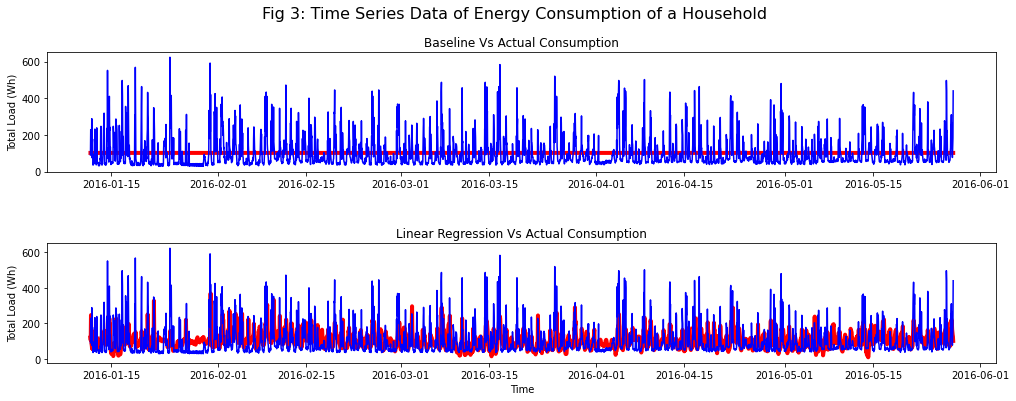

In [6]:
# Define feature and target values
X_train = df.drop(columns = ["total"])
y_train = df["total"]

# Compute baseline mean absolute error to compare
y_pred_baseline = [y_train.mean()] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Baseline MAE:", round(mae_baseline, 2))

#Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the total load 
y_pred_training = model.predict(X_train)

# Compute the model mean absolute error 
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

fig,ax = plt.subplots(2,1,figsize = (15,6) )
fig.tight_layout(pad=5.0)
ax[0].plot(pd.Series(y_pred_baseline, index = y_train.index), "red", linewidth = 4)
ax[0].plot(y_train, "blue")
ax[0].set_ylabel("Total Load (Wh)")
ax[0].set_title("Baseline Vs Actual Consumption")
ax[1].plot(pd.Series(y_pred_training, index = y_train.index), "red", linewidth = 4)
ax[1].plot(y_train, "blue")
ax[1].set_ylabel("Total Load (Wh)")
ax[1].set_xlabel("Time")
ax[1].set_title("Linear Regression Vs Actual Consumption")
fig.suptitle("Fig 3: Time Series Data of Energy Consumption of a Household", fontsize = 16)
plt.show()

General:

Very nice use of hourly resampling!

Data description:

Nice, clear descriptions!

Here is a small Python trick:

Instead of:

n = n + 1
Try:

n += 1
Alternative, you can avoid the double-loop like this:

fig, axs = plt.subplots(6,4, figsize = (20, 25))
fig.subplots_adjust(top=0.95)
for i,ax in enumerate( axs.ravel() ):
   ax.scatter(df[df.columns[i]], df["total"])
   ax.set(xlabel=df.columns[i], ylabel="Total Load (W)")
plt.suptitle("Figure 1: General IV and DV Relationships", fontsize = 16)
plt.show()
Hypothesis testing:

When using the sn.heatmap function with correlation coefficients it is usually a good idea to:

(a) set the range to (-x, +x) where x is between 0 and 1

(b) choose a diverging colormap (e.g. "bwr")

like this:

sn.heatmap(corM, cmap='bwr', vmin=-0.5, vmax=0.5)
This makes it easier to see the relative contributions of positive and negative correlations

See colormap choices here:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

Machine learning:

Very nice!

For your Final Project it will be important to explore these results a little further to elucidate which factor(s) may be most responsible for the result